# **Enunciado**
Para todo engenheiro de Machine Learning é fundamental que todos os 7 passos para
construção de uma solução sejam seguidos. Nesse sentido, saber percorrer todas essas
etapas e, ao final, identificar a melhor estratégia é papel primordial para esse profissional.
Neste desafio final, vamos empregar boa parte dos conceitos mostrados no decorrer de
todos os módulos do bootcamp para a análise e a classificação de veículos do conhecido
dataset “cars”. Esse dataset contém um conjunto de informações sobre vários veículos
pesquisados. Existem dados, por exemplo, sobre a potência do veículo, sobre a origem e
cilindradas cúbicas. 
Para essa análise, vamos empregar os conceitos de redução da dimensionalidade com o
PCA, clusterização com o K-Means e classificações com algoritmos supervisionados. 

# **Atividades:**

In [ ]:
import pandas as pd #biblioteca para manipulação de dados
import numpy as np #biblioteca para utilizacao de vetores e matrizes
import matplotlib.pyplot as plt #bibloteca para plotar graficos
import seaborn as sns #gráficos mais sofisticados

In [ ]:
#liberando acesso do colab aos arquivos no drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cars = pd.read_csv('/content/gdrive/My Drive/Datasets/cars.csv')
cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [ ]:
cars.describe()

,mpg,cylinders,hp,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,106.360153,15.547893,1976.819923
std,7.823570,1.733310,40.499959,2.910625,3.637696
min,10.000000,3.000000,46.000000,8.000000,1971.000000
25%,16.900000,4.000000,75.000000,14.000000,1974.000000
50%,22.000000,6.000000,95.000000,16.000000,1977.000000
75%,28.800000,8.000000,138.000000,17.000000,1980.000000
max,46.600000,8.000000,230.000000,25.000000,1983.000000


In [ ]:
cars.shape

(261, 8)

In [ ]:
cars.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

# Pré-processamento

In [ ]:
cars['brand'].unique()

array([' US.', ' Europe.', ' Japan.'], dtype=object)

In [ ]:
#Mapeamento dos valores únicos

name_to_class = {
    ' US.' : 1,
    ' Europe.': 2,
    ' Japan.' : 3
}

In [ ]:
cars_2 = cars.copy()
cars_2['brand'] = cars_2['brand'].map(name_to_class)
cars_2.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,1
1,31.9,4,89,71,1925,14,1980,2
2,17.0,8,302,140,3449,11,1971,1
3,15.0,8,400,150,3761,10,1971,1
4,30.5,4,98,63,2051,17,1978,1


In [ ]:
#converte a coluna e transforma os valores nulos escondidos em NaN
cars_2['cubicinches'] = pd.to_numeric(cars_2['cubicinches'], errors='coerce')
cars_2['weightlbs'] = pd.to_numeric(cars_2['weightlbs'], errors='coerce')
cars_2.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,1
1,31.9,4,89.0,71,1925.0,14,1980,2
2,17.0,8,302.0,140,3449.0,11,1971,1
3,15.0,8,400.0,150,3761.0,10,1971,1
4,30.5,4,98.0,63,2051.0,17,1978,1


In [ ]:
cars_2.isnull().sum().sum()

5

In [ ]:
#verificando linhas com valores nulos
cars_2.query('cubicinches != cubicinches')

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
40,16.0,6,NaN,105,3897.0,19,1976,1
180,19.8,6,NaN,85,2990.0,18,1980,1


In [ ]:
cars_2.fillna(cars_2.mean(), inplace=True)

In [ ]:
cars_2.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923,1.574713
std,7.823570,1.733310,108.837269,40.499959,849.097575,2.910625,3.637696,0.798540
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000,1.000000
25%,16.900000,4.000000,101.000000,75.000000,2254.000000,14.000000,1974.000000,1.000000
50%,22.000000,6.000000,156.000000,95.000000,2904.000000,16.000000,1977.000000,1.000000
75%,28.800000,8.000000,302.000000,138.000000,3664.000000,17.000000,1980.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000,3.000000


In [ ]:
cars_corr = cars_2[['cylinders', 'mpg']].corr()

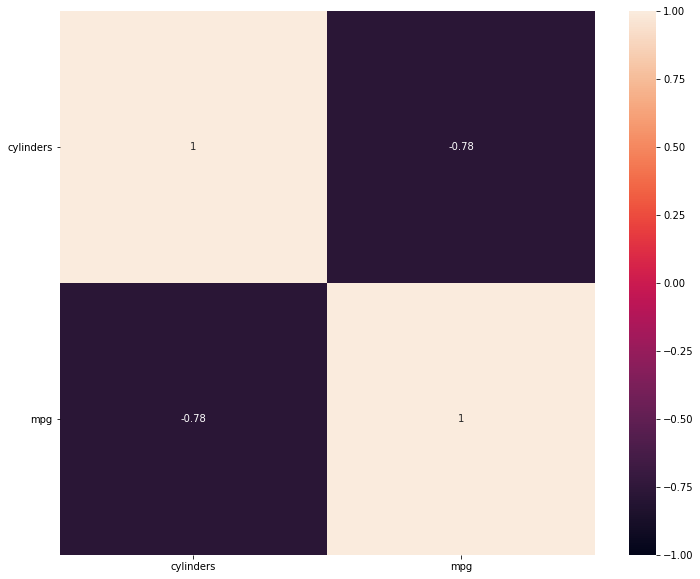

In [ ]:
#verificando a correlação de Pearson
plt.figure(figsize=(12,10))
sns.heatmap(cars_corr, annot=True, vmax=1, vmin=-1)
plt.yticks(rotation=0)
plt.show()

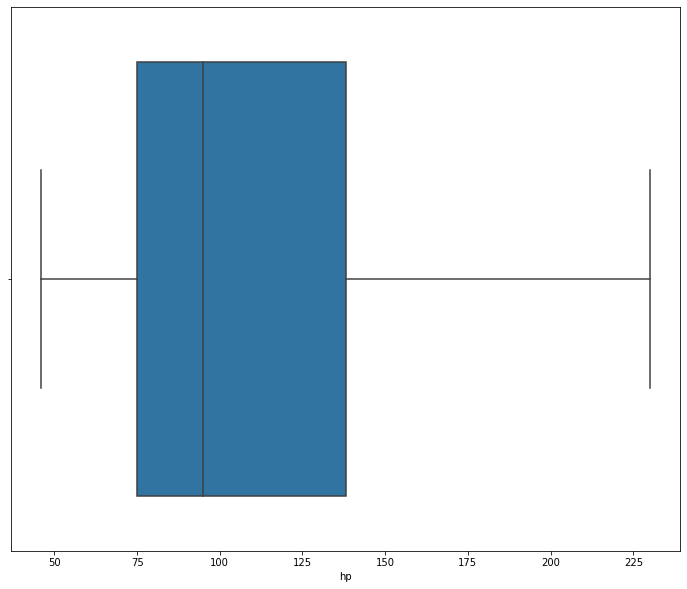

In [ ]:
plt.figure(figsize=(12, 10))
sns.boxplot(x='hp', data=cars_2)
plt.show()

In [ ]:
X = np.array(cars_2.iloc[:, :-1])
Y = np.array(cars_2['brand'])

In [ ]:
from sklearn.preprocessing import StandardScaler
#normaliza = StandardScaler().fit(cars_2[['hp']]) #objeto para a normalização
#cars_2['hp'] = normaliza.transform(cars_2[['hp']])
#cars_2.describe()

In [ ]:
normaliza = StandardScaler().fit(X)
X = normaliza.transform(X)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7) #Objeto para redução de dimensionalidade
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.72371349 0.12675138 0.09126131 0.02773591 0.01766794 0.00798425
 0.00488572]


In [ ]:
from sklearn.decomposition import PCA
pca_2 = PCA(n_components=3) #Objeto para redução de dimensionalidade
pca_2.fit(X)
print(pca_2.explained_variance_ratio_)

[0.72371349 0.12675138 0.09126131]


# K-means

In [ ]:
from sklearn.cluster import KMeans
data = pca_2.components_
kmeans_model = KMeans(n_clusters=3,random_state=42).fit(data)

In [ ]:
centroids = kmeans_model.cluster_centers_
labels = kmeans_model.labels_
print(centroids)
print(labels)

[[-0.19235786 -0.19070807 -0.16849764 -0.08613966 -0.2292615  -0.02652165
  -0.9151793 ]
 [-0.39506171  0.41462456  0.42751253  0.42083433  0.40887239 -0.3142291
  -0.2150062 ]
 [-0.2680554   0.1391496   0.10340802 -0.185907    0.31224967  0.87177683
  -0.07768119]]
[1 0 2]


In [ ]:
#usando a função apply para criar uma nova coluna
cars_2['efficiency'] = cars_2.apply(lambda row: 1 if row.mpg > 25 else 0, axis=1)

In [ ]:
cars_2.drop('brand', axis=1, inplace=True)
cars_2.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,efficiency
0,14.0,8,350.0,165,4209.0,12,1972,0
1,31.9,4,89.0,71,1925.0,14,1980,1
2,17.0,8,302.0,140,3449.0,11,1971,0
3,15.0,8,400.0,150,3761.0,10,1971,0
4,30.5,4,98.0,63,2051.0,17,1978,1


In [ ]:
X = np.array(cars_2.iloc[:, 1: -2]) #cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60'
Y = np.array(cars_2.iloc[:, -1]) #Todas as linhas da última coluna
X

array([[8.000e+00, 3.500e+02, 1.650e+02, 4.209e+03, 1.200e+01],
       [4.000e+00, 8.900e+01, 7.100e+01, 1.925e+03, 1.400e+01],
       [8.000e+00, 3.020e+02, 1.400e+02, 3.449e+03, 1.100e+01],
       ...,
       [6.000e+00, 2.320e+02, 1.120e+02, 2.835e+03, 1.500e+01],
       [6.000e+00, 2.320e+02, 1.000e+02, 3.288e+03, 1.600e+01],
       [6.000e+00, 2.500e+02, 1.050e+02, 3.353e+03, 1.500e+01]])

In [ ]:
# importar train_test_split do scikitlearn 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

# **Árvore de Decisão**

In [ ]:
from sklearn.tree import DecisionTreeClassifier #Importando o modelo de árvore de decisão
clf_tree = DecisionTreeClassifier(random_state=42)#instanciando a árvore de decisão
clf_tree.fit(x_train, y_train) #Treinando o modelo

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y_pred = clf_tree.predict(x_test)

In [ ]:
p = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})  
p.head(10)

,Real,Previsto
0,1,1
1,1,1
2,1,1
3,0,1
4,0,0
5,1,1
6,1,1
7,1,1
8,1,1
9,0,0


In [ ]:
from sklearn import metrics
#avaliando o modelo de Árvore de Decisão
print('Matriz de Confusão\n', metrics.confusion_matrix(y_test, y_pred)) 
print('\nAcurácia\n', metrics.accuracy_score(y_test, y_pred))
print('\nAcurácia Balanceada por classe\n', metrics.balanced_accuracy_score(y_test, y_pred))
print('\nPrecision\n', metrics.precision_score(y_test, y_pred))
print('\nRecall\n', metrics.recall_score(y_test, y_pred)) 
print('\nF1\n', metrics.f1_score(y_test, y_pred)) 


Matriz de Confusão
 [[33  8]
 [ 2 36]]

Acurácia
 0.8734177215189873

Acurácia Balanceada por classe
 0.8761232349165597

Precision
 0.8181818181818182

Recall
 0.9473684210526315

F1
 0.8780487804878049


In [ ]:
from sklearn.linear_model import LogisticRegression #importando o modelo de Regressão Logística
clf_log_reg = LogisticRegression(random_state=42) #instanciando o modelo
clf_log_reg.fit(x_train, y_train) #treinando o modelo

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = clf_log_reg.predict(x_test) #realizando previsão com o modelo treinado

In [ ]:
p2 = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})  
p2.head(10)

,Real,Previsto
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
5,1,1
6,1,0
7,1,1
8,1,1
9,0,0


In [ ]:
#avaliando o modelo de Regresão Logística
print('Matriz de Confusão\n', metrics.confusion_matrix(y_test, y_pred)) 
print('\nAcurácia\n', metrics.accuracy_score(y_test, y_pred))
print('\nAcurácia Balanceada por classe\n', metrics.balanced_accuracy_score(y_test, y_pred))
print('\nPrecision\n', metrics.precision_score(y_test, y_pred))
print('\nRecall\n', metrics.recall_score(y_test, y_pred)) 
print('\nF1\n', metrics.f1_score(y_test, y_pred))

Matriz de Confusão
 [[36  5]
 [ 6 32]]

Acurácia
 0.8607594936708861

Acurácia Balanceada por classe
 0.8600770218228497

Precision
 0.8648648648648649

Recall
 0.8421052631578947

F1
 0.8533333333333334
